# Regresión - Optimizr y guardar modelos

En el cuaderno anterior, usamos modelos de regresión complejos para observar la relación entre las características de un conjunto de datos de alquiler de bicicletas. En este portátil, veremos si podemos mejorar aún más el rendimiento de estos modelos.

Comencemos cargando los datos de bicicletas compartidas como un **Pandas** DataFrame y viendo las primeras filas. Como de costumbre, también divideremos nuestros datos en conjuntos de datos de entrenamiento y prueba.

In [1]:
# Módulos de importación que necesitaremos para este cuaderno 
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Cargar el conjunto de datos entrenamiento 
url = "https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv"
bike_data = pd.read_csv(url)
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']
bike_data[numeric_features + ['rentals']].describe()
print(bike_data.head())


# Características y etiquetas separadas
# Después de separar el cojunto de datos, ahora tene mos matrices numpy llamadas **x** que contienen las características y **y** que contienen las etiquetas
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))


   instant    dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  1/1/2011       1   0     1        0        6           0   
1        2  1/2/2011       1   0     1        0        0           0   
2        3  1/3/2011       1   0     1        0        1           1   
3        4  1/4/2011       1   0     1        0        2           1   
4        5  1/5/2011       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  rentals  day  
0           2  0.344167  0.363625  0.805833   0.160446      331    1  
1           2  0.363478  0.353739  0.696087   0.248539      131    2  
2           1  0.196364  0.189405  0.437273   0.248309      120    3  
3           1  0.200000  0.212122  0.590435   0.160296      108    4  
4           1  0.226957  0.229270  0.436957   0.186900       82    5  
Training Set: 511 rows
Test Set: 220 rows


Ahora tenemos los siguientes cuatro conjuntos de datos: 
- **X_train** : los valores de características que usaremos para entrenar el modelo
- **y_train** : las etiquetas correspondientes que usaremos para entrenar el modelo
- **X_test** : los valores de características que usaremos para validar el modelo
- **y_test** : las etiquetas correspondientes que usaremos para validar el modelo

Ahora estamos listos para entrenar un modelo ajustando un algoritmo de conjunto *potenciador*, como en nuestro último cuaderno. Recuerde que un estimador de aumento de gradiente es como un algoritmo de bosque aleatorio, pero en lugar de construir todos los árboles de forma independiente y tomar el resultado promedio, cada árbol se construye sobre las salidas del anterior en un intento de reducir gradualmente la *pérdida* (error) en el modelo.


GradientBoostingRegressor() 

MSE: 103927.90861242749
RMSE: 322.3785176038061
R2: 0.7962558580594555


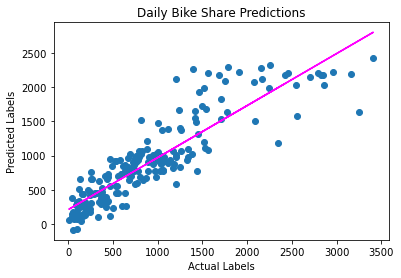

In [2]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor


# Fit a lasso model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## Optimizar hiperparámetros

Esche un vistazo a la definición del estimador **GradientBoostingRegressor** en el resultado anterior y tenga en cuenta que, al igual que los otros estimadores que probamos anteriormente, incluye una gran cantidad de parámetros que controlan la forma  en que se entrena el modelo. En aprendizaje automático, el término *parámetros* se refiere a valors que se pueden determinar a partir de datos; los valores que especifica para afectar el comportamiento de un algormitmo de entrenamiento se conocen más correctamente como *hiperparámetros*.

Los hiperparámetros específicos para un estimador varían según el algoritmo que encapsula el estimador. En el caso de estimador **GradientBosstingRegressor**, el algoritmo en un conjunto de combina varios árboles de decisión para crear un modelo predictivo general. Puede obtener información sobres los hiperparámetros para este estimador en la [Scikit-Learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html).

No entraremos en los detalles de cada hiperparámetro aquí, pero trabajan juntos para afectar la forma en que el algoritmo entrena un modelo. En muchos casos, los valores predeterminados proporcionados por Scikit-Learn fincionarán bien; pero puede haber alguna ventaja en la modificación de los hiperparámetros para obtener un mejor rendimiento predictivo o reducir el tiempo de entrenamiento.

Entonces, ¿cómo sabe qué valores de hiperparámetro debe usar? Bueno, en ausencia de una compresión profunda de cómo funciona el algoritmo subyacente, deberá experimnetar. Afortunadamente, Scikit-Learn proporciona una forma de *ajustar* los hiperparámetros probando varias combinaciones y encontrando el mejor resultado para una métrica de rendimiento determinada.

Intentemos usar un enfoque de *búsqueda de cuadrícula* para probar combinaciones de una cuadrícula de valroes posibles para los hiperparámetros **learning_rate** y **n_estimators** del estimador **GradientBoostingRegressor**.

Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 100} 

GradientBoostingRegressor() 

MSE: 104088.58057220923
RMSE: 322.6276190474232
R2: 0.7959408707666609


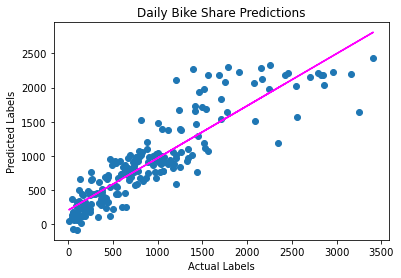

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

> **Nota** : el uso de valores aleatorios en el algoritmo Gradient Boost de como resultado métricas ligeramente diferentes cada vez. En este caso, es poco probable que el mejor modelo producido por el ajuste de hiperparámetros sea significativamente mejor que uno entrenado con los valores predeterminados de hiperparámetros; ¡pero sigue siendo útil ocnocer la técnica de ajuste de hiperparámetros!

## Preprocesar los datos 

Entrenamos un modelo con datos ue se cargaron directamente desde un archivo de origen, con resultados solo moderadamente exitosos.

En la práctica, es común realizar algún preprocesamiento de los datos para que sea más fácil para el algoritmo ajustar un modelo a ellos. Hay una gran variedad de transformaciones de preprocesamiento que puede realizar para preparar sus datos el modelado, pero no limitaremos a algunas técnicas comunes:

### Escalar características numéricas
La normalización 